## Climate Analysis

Using Python and SQLAlchemy again, data exploration and basic climate analysis done. Tools used will be ORM queries via SQLAlchemy, Matplotlib, and Pandas. Analysis is performed on precipitation, temperature, and stations and Flask API has been designed to return user queries in a json format.

In [1]:
# Import important dependencies
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import datetime as dt
import time

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import MetaData, inspect

### Setting up and Reflecting Tables into SQLAlchemy ORM

In [3]:
# Database setup
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [5]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

### Exploring the dataset
It is a good practice to get some information 
like name and types about the available tables before pass to dip analysis

In [8]:
# we can also get the table names for each table from inspector liberary
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [9]:
# Get a list of columns name and types for measurment tables
columns = inspector.get_columns("measurement")
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
# Get a list of columns name and types for station tables
columns = inspector.get_columns("station")
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

to calculate the last 12 months of precipitation data, we need to get the first and last date within the year from the measurement tables. Then, I can calculate the last 12 months starting from last date to 1 year backward.

In [11]:
first_date = session.query(Measurement.date).order_by(Measurement.date).first()
print(first_date)

('2010-01-01',)


In [12]:
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)

('2017-08-23',)


Using the Last date to find out the last 12 years data. 
So, the last 12 months of precipitation data as last_year is:

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_year= session.query(Measurement.date, Measurement.prcp).\
        filter(Measurement.date >= '2016-08-24').filter(Measurement.date <= '2017-08-23').order_by(Measurement.date).all()

In [14]:
last_year

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [15]:
# Calculate the date 1 year ago from the last data point in the database
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
print(f'The date one year ago from last date is: {year_ago}')

The date one year ago from last date is: 2016-08-23


In [16]:
# Perform a query to retrieve the data and precipitation scores
prcp_data= session.query(Measurement.date, Measurement.prcp.label("precipitation")).\
        filter(Measurement.date >= '2016-08-24').filter(Measurement.date <= '2017-08-23').order_by(Measurement.date).all()
prcp_data

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [17]:
# Save the query results as a Pandas DataFrame and set the index to the date column

last_year_df = pd.DataFrame(last_year)
last_year_df.set_index('date', inplace=True)
last_year_df.head()

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


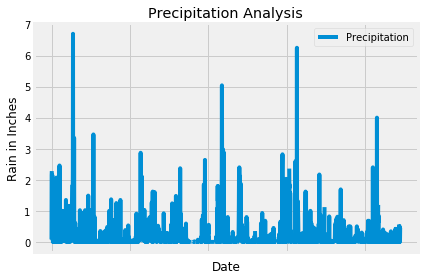

In [18]:
#Ploting precipitation data
# pandas datafrome and setting date as index 
prcp_data = pd.DataFrame(prcp_data)
prcp_data.set_index('date')

# Use Pandas Plotting with Matplotlib to plot the data

prcp_data.plot('date', 'precipitation')
plt.xlabel("Date")
plt.ylabel("Rain in Inches")
plt.title("Precipitation Analysis")
plt.legend(["Precipitation"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_data.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

In [20]:
# Design a query to show how many stations are available in this dataset?
num_station = session.query(Station.station).count()
print(num_station)
print(f'In this datasets, the available stations are: {num_station}')

9
In this datasets, the available stations are: 9


In [21]:
# List the stations and the counts in descending order.
stations = engine.execute("SELECT station, count(station) FROM measurement GROUP BY station ORDER BY count(station) DESC").fetchall()
for station in stations:
    print(station)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


## What are the most active stations?

In [22]:
# What are the most active stations? (i.e. what stations have the most rows)?
active_station = session.query(Measurement.station, func.count(Measurement.station)).\
              group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
most_active = active_station[0]
num_rows = active_station[1]
print(active_station)
print(f'The Most Active Station is {most_active} and it has the highest number of observations, which is: {num_rows}')

('USC00519281', 2772)
The Most Active Station is USC00519281 and it has the highest number of observations, which is: 2772


#### Using the station id from the previous query, calculate the lowest temperature recorded,  highest temperature recorded, and average temperature most active station?


In [23]:
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == most_active).first()

(54.0, 85.0, 71.66378066378067)

In [24]:
# Choose the station with the highest number of temperature observations.
temp_obs =session.query(func.count(Measurement.tobs), Measurement.station). \
                                    group_by(Measurement.station). \
                                    order_by(func.count(Measurement.tobs).desc()).all()
print(f'The Station with the highest number of temprature observation is: {temp_obs[0][1]}')

The Station with the highest number of temprature observation is: USC00519281


In [25]:
#Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_12month = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date > '2016-08-24').\
    filter(Measurement.station == 'USC00519281').\
    order_by(Measurement.date).all()
temp_12month

[('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-05', 79.0),
 ('2016-10-06', 75.0),
 ('2016-10-

In [26]:
temp_data = pd.DataFrame(temp_12month)
temp_data.set_index("date", inplace=True)
temp_data.head()

,tobs
date,
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
2016-08-28,73.0
2016-08-29,78.0


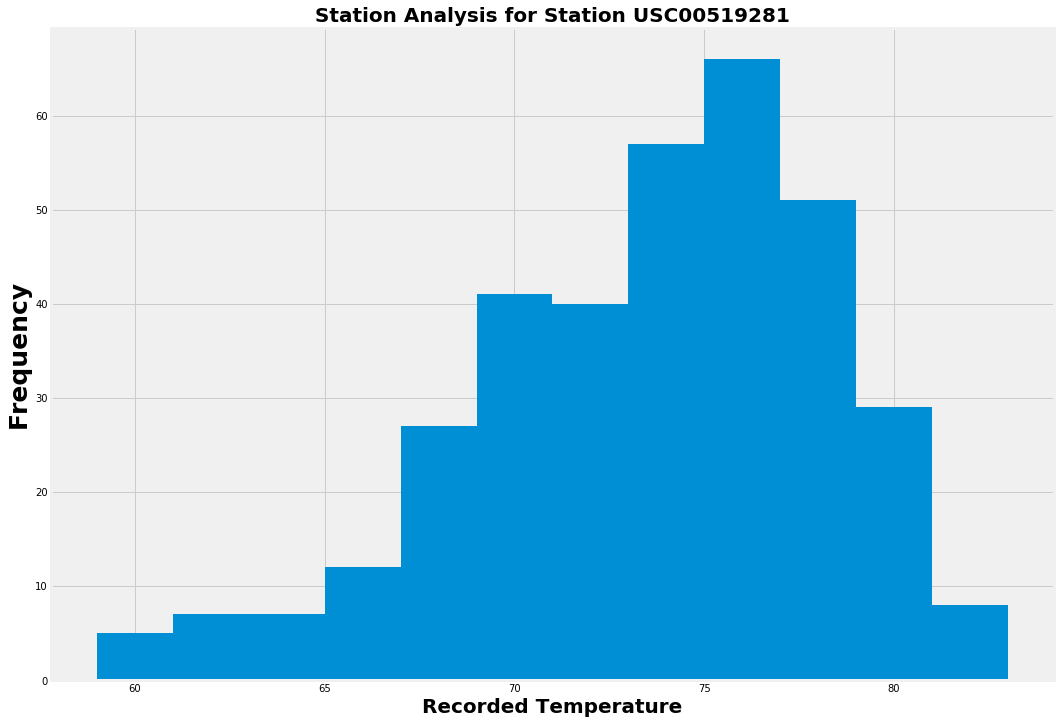

In [29]:
plt.figure(figsize =(16,12))
plt.hist(temp_data['tobs'],12)
plt.xlabel("Recorded Temperature", fontsize=20, weight="bold")
plt.ylabel("Frequency",fontsize=25, weight="bold")
plt.title("Station Analysis for Station " + most_active,fontsize=20, weight="bold")
plt.show()